In [3]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pickle

import torch
import torch.nn as nn

from mlp_pytorch import MLP
import cifar10_utils

In [4]:
test_loss_x = []
num_steps   = 1500

for i in range(num_steps):
    if (i % 100 == 0) or (i == num_steps - 1):
        test_loss_x.append(i)

## 1 NumPy stuff

In [5]:
def plot_accuracies(acc):
    plt.figure()
    plt.plot(test_loss_x, acc)
    plt.xlabel('Steps')
    plt.ylabel('Accuracy')
    plt.grid(True)
    
def plot_loss(train_loss, test_loss):
    plt.figure()
    plt.plot(test_loss_x, train_loss, label='Train Loss')
    plt.plot(test_loss_x, test_loss,  label='Test  Loss')
    plt.xlabel('Steps')
    plt.ylabel('Loss')
    plt.grid(True)
    plt.legend()


In [35]:
training_losses = [2.303, 1.739, 1.630, 1.830, 1.72, 1.514, 1.667, 1.509, 1.457,
                   1.544, 1.396, 1.535, 1.615, 1.421, 1.458, 1.652]

test_losses = [2.302, 1.759, 1.662, 1.660, 1.583, 1.632, 1.601, 1.758, 1.670, 1.495,
               1.534, 1.529, 1.665, 1.532, 1.503, 1.702]

accuracies = [0.162, 0.370, 0.411, 0.413, 0.435, 0.418, 0.435, 0.397, 0.419, 0.470,
              0.459, 0.471, 0.431, 0.468, 0.473, 0.422]



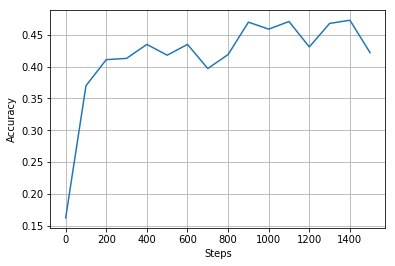

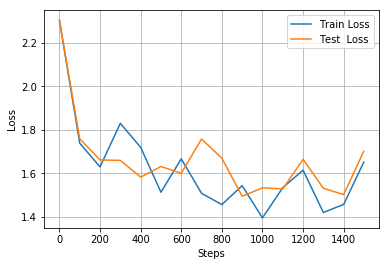

In [37]:
plot_accuracies(accuracies)
plot_loss(training_losses, test_losses)

## 2 PyTorch

In [4]:
# Baseline
path = '../models/AAA-steps-1500_layers-100_lr-0.002_bs-200/'

with open(path + 'accuracies', 'rb') as f:
    accuracies = pickle.load(f)
with open(path + 'test_loss', 'rb') as f:
    test_loss = pickle.load(f)
with open(path + 'train_loss', 'rb') as f:
    train_loss = pickle.load(f)

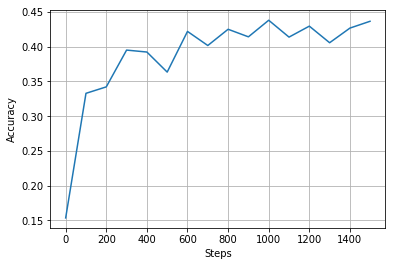

In [27]:
plot_accuracies(accuracies)
plot_loss(train_loss, test_loss)

In [7]:
# Baseline for comparison
baseline = '../models/steps-10000_layers-100_lr-0.002_bs-200/'

with open(baseline + 'accuracies', 'rb') as f:
    accuracies_baseline = pickle.load(f)
with open(baseline + 'test_loss', 'rb') as f:
    test_loss_baseline = pickle.load(f)
with open(baseline + 'train_loss', 'rb') as f:
    train_loss_baseline = pickle.load(f)
    
test_loss_x = []
num_steps   = 10000

for i in range(num_steps):
    if (i % 100 == 0) or (i == num_steps - 1):
        test_loss_x.append(i)

### Hidden Layers

In [8]:
# Hidden Layers
arch1    = '../models/steps-10000_layers-100,300,500,300,100_lr-0.002_bs-200/'
arch2    = '../models/steps-10000_layers-300,300,300_lr-0.002_bs-200/'
arch3    = '../models/steps-10000_layers-300,500,300_lr-0.002_bs-200/'
arch4    = '../models/steps-10000_layers-500_lr-0.002_bs-200/'
arch5    = '../models/steps-10000_layers-1000,300_lr-0.002_bs-200/'

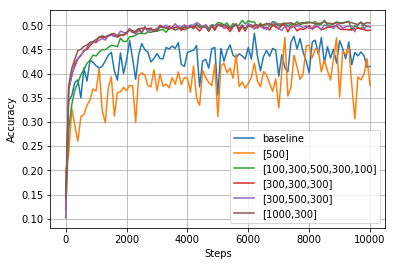

In [10]:
with open(arch1 + 'accuracies', 'rb') as f:
    accuracies_arch1 = pickle.load(f)
with open(arch2 + 'accuracies', 'rb') as f:
    accuracies_arch2 = pickle.load(f)
with open(arch3 + 'accuracies', 'rb') as f:
    accuracies_arch3 = pickle.load(f)
with open(arch4 + 'accuracies', 'rb') as f:
    accuracies_arch4 = pickle.load(f)    
with open(arch5 + 'accuracies', 'rb') as f:
    accuracies_arch5 = pickle.load(f)

plt.figure()
plt.plot(test_loss_x, accuracies_baseline, label='baseline')
plt.plot(test_loss_x, accuracies_arch4, label='[500]')
plt.plot(test_loss_x, accuracies_arch1, label='[100,300,500,300,100]')
plt.plot(test_loss_x, accuracies_arch2, label='[300,300,300]')
plt.plot(test_loss_x, accuracies_arch3, label='[300,500,300]')
plt.plot(test_loss_x, accuracies_arch5, label='[1000,300]')

plt.xlabel('Steps')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

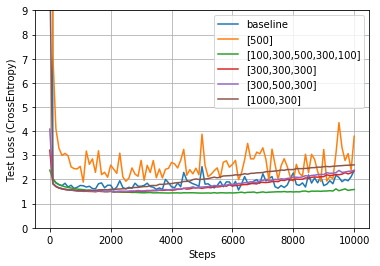

In [26]:
with open(arch1 + 'test_loss', 'rb') as f:
    test_loss_arch1 = pickle.load(f)
with open(arch2 + 'test_loss', 'rb') as f:
    test_loss_arch2 = pickle.load(f)
with open(arch3 + 'test_loss', 'rb') as f:
    test_loss_arch3 = pickle.load(f)
with open(arch4 + 'test_loss', 'rb') as f:
    test_loss_arch4 = pickle.load(f)    
with open(arch5 + 'test_loss', 'rb') as f:
    test_loss_arch5 = pickle.load(f)

plt.figure()
plt.plot(test_loss_x, test_loss_baseline, label='baseline')
plt.plot(test_loss_x, test_loss_arch4, label='[500]')
plt.plot(test_loss_x, test_loss_arch1, label='[100,300,500,300,100]')
plt.plot(test_loss_x, test_loss_arch2, label='[300,300,300]')
plt.plot(test_loss_x, test_loss_arch3, label='[300,500,300]')
plt.plot(test_loss_x, test_loss_arch5, label='[1000,300]')

plt.xlabel('Steps')
plt.ylabel('Test Loss (CrossEntropy)')
plt.legend()
plt.ylim(-0, 9)
plt.grid(True)

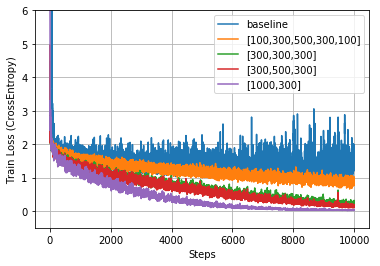

In [29]:
with open(arch1 + 'train_loss', 'rb') as f:
    train_loss_arch1 = pickle.load(f)
with open(arch2 + 'train_loss', 'rb') as f:
    train_loss_arch2 = pickle.load(f)
with open(arch3 + 'train_loss', 'rb') as f:
    train_loss_arch3 = pickle.load(f)
with open(arch4 + 'train_loss', 'rb') as f:
    train_loss_arch4 = pickle.load(f)    
with open(arch5 + 'train_loss', 'rb') as f:
    train_loss_arch5 = pickle.load(f)

plt.figure()
plt.plot(train_loss_baseline, label='baseline')
# plt.plot(train_loss_arch4, label='[500]')
plt.plot(train_loss_arch1, label='[100,300,500,300,100]')
plt.plot(train_loss_arch2, label='[300,300,300]')
plt.plot(train_loss_arch3, label='[300,500,300]')
plt.plot(train_loss_arch5, label='[1000,300]')

plt.xlabel('Steps')
plt.ylabel('Train Loss (CrossEntropy)')
plt.legend()
plt.ylim(-0.5, 6)
plt.grid(True)

### Weight normalization

In [30]:
# Weight decay
arch1    = '../models/models_2/models/steps-50000_layers-1000,300_lr-0.002_bs-200_SGDmomentum-0.9_SGDweightDecay-0.0005/'
arch2    = '../models/models_2/models/steps-50000_layers-1000,300_lr-0.002_bs-200_SGDweightDecay-0.2/'

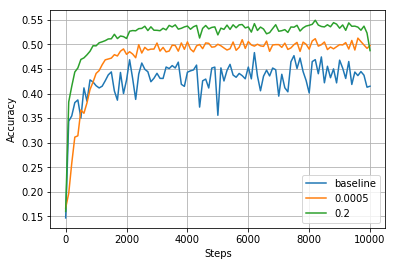

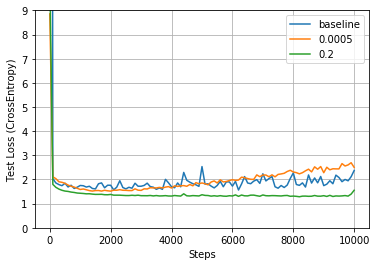

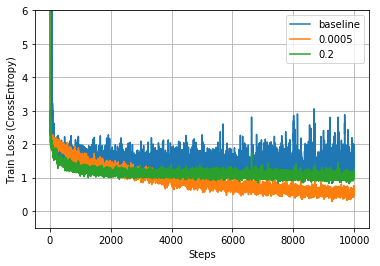

In [36]:
with open(arch1 + 'accuracies', 'rb') as f:
    accuracies_arch1 = pickle.load(f)
with open(arch2 + 'accuracies', 'rb') as f:
    accuracies_arch2 = pickle.load(f)

plt.figure()
plt.plot(test_loss_x, accuracies_baseline, label='baseline')
plt.plot(test_loss_x, accuracies_arch1[:101], label='0.0005')
plt.plot(test_loss_x, accuracies_arch2[:101], label='0.2')


plt.xlabel('Steps')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

with open(arch1 + 'test_loss', 'rb') as f:
    test_loss_arch1 = pickle.load(f)
with open(arch2 + 'test_loss', 'rb') as f:
    test_loss_arch2 = pickle.load(f)

plt.figure()
plt.plot(test_loss_x, test_loss_baseline, label='baseline')
plt.plot(test_loss_x, test_loss_arch1[:101], label='0.0005')
plt.plot(test_loss_x, test_loss_arch2[:101], label='0.2')

plt.xlabel('Steps')
plt.ylabel('Test Loss (CrossEntropy)')
plt.legend()
plt.ylim(-0, 9)
plt.grid(True)

with open(arch1 + 'train_loss', 'rb') as f:
    train_loss_arch1 = pickle.load(f)
with open(arch2 + 'train_loss', 'rb') as f:
    train_loss_arch2 = pickle.load(f)

plt.figure()
plt.plot(train_loss_baseline, label='baseline')
plt.plot(train_loss_arch1[:10000], label='0.0005')
plt.plot(train_loss_arch2[:10000], label='0.2')


plt.xlabel('Steps')
plt.ylabel('Train Loss (CrossEntropy)')
plt.legend()
plt.ylim(-0.5, 6)
plt.grid(True)

### Batch Size

In [41]:
# Weight decay
arch1    = '../models/steps-20000_layers-100_lr-0.002_bs-50/'
arch2    = '../models/steps-10000_layers-100_lr-0.002_bs-500/'

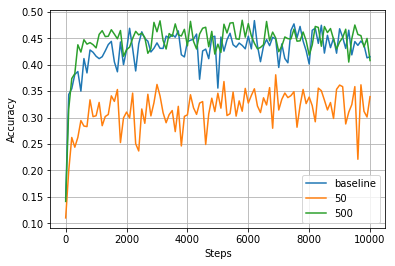

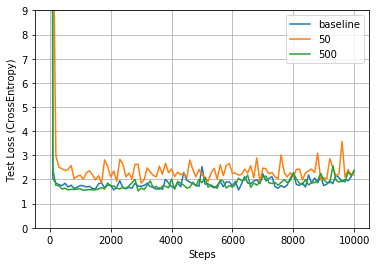

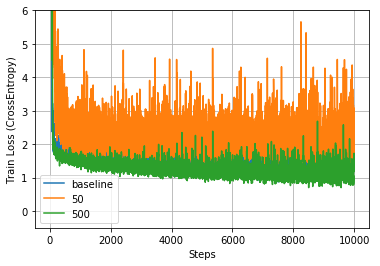

In [42]:
with open(arch1 + 'accuracies', 'rb') as f:
    accuracies_arch1 = pickle.load(f)
with open(arch2 + 'accuracies', 'rb') as f:
    accuracies_arch2 = pickle.load(f)

plt.figure()
plt.plot(test_loss_x, accuracies_baseline, label='baseline')
plt.plot(test_loss_x, accuracies_arch1[:101], label='50')
plt.plot(test_loss_x, accuracies_arch2[:101], label='500')


plt.xlabel('Steps')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

with open(arch1 + 'test_loss', 'rb') as f:
    test_loss_arch1 = pickle.load(f)
with open(arch2 + 'test_loss', 'rb') as f:
    test_loss_arch2 = pickle.load(f)

plt.figure()
plt.plot(test_loss_x, test_loss_baseline, label='baseline')
plt.plot(test_loss_x, test_loss_arch1[:101], label='50')
plt.plot(test_loss_x, test_loss_arch2[:101], label='500')

plt.xlabel('Steps')
plt.ylabel('Test Loss (CrossEntropy)')
plt.legend()
plt.ylim(-0, 9)
plt.grid(True)

with open(arch1 + 'train_loss', 'rb') as f:
    train_loss_arch1 = pickle.load(f)
with open(arch2 + 'train_loss', 'rb') as f:
    train_loss_arch2 = pickle.load(f)

plt.figure()
plt.plot(train_loss_baseline, label='baseline')
plt.plot(train_loss_arch1[:10000], label='50')
plt.plot(train_loss_arch2[:10000], label='500')


plt.xlabel('Steps')
plt.ylabel('Train Loss (CrossEntropy)')
plt.legend()
plt.ylim(-0.5, 6)
plt.grid(True)

## 4 PyTorch CNN

In [6]:
training_loss = [2.280, 1.821, 1.415, 1.292, 1.146, 0.883, 1.471, 1.286,
                 0.819, 0.931, 0.590]

test_loss = [2.306, 1.501, 1.281, 1.186, 1.071, 0.998, 0.917, 0.884, 0.814,
             0.761, 0.734]
accuracies = [0.149, 0.442, 0.541, 0.574, 0.615, 0.646, 0.677, 0.691, 0.717,
              0.738, 0.748]

test_loss_x = []
num_steps   = 5000

for i in range(num_steps):
    if (i % 500 == 0) or (i == num_steps - 1):
        test_loss_x.append(i)

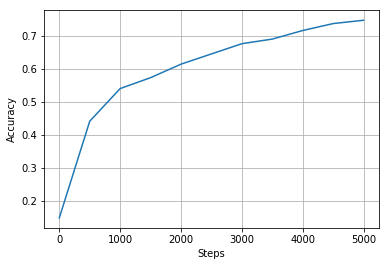

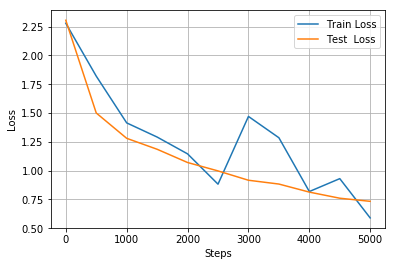

In [7]:
plot_accuracies(accuracies)
plot_loss(training_loss, test_loss)